# Pymaceuticals Inc.

---

Data Analysis 


Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. The executive team also has asked for a top-level summary of the study results.

Findings: 
1)The SCC tumor size is getting smaller day by for the mice that are taking Capomulin, it is a negative correlation between tumor size vs. days. 



2)For the mice that are taking Caponulin, we notice the heavier the mice, the bigger the tumor. This is confirmed with the strong correlation R2 = .84



3)Beside Capomulin, mice on Ramicane is getting similar results as mice on Capomulin, the mass volume of the tumor is getting smaller and smaller during the 45 days. Both of these drug appears to be effective on reducing the cancer cells in mice. 



4)The mice gender distribution between male and female is pretty closely to each other, 49% female vs. 51% male. 



5)Of the 4 drugs of interest, Capomulin and Ramicane metrics are pretty close to each other, the other 2 drugs doesn't seem to have much effect on the size of the tumors. 
        


In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [75]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = 'left')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [76]:
# Checking the number of mice
df['Mouse ID'].nunique() 

249

In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [78]:
# Optional: Get all the data for the duplicate mouse ID..info()

mask=df["Mouse ID"]== "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df["Mouse ID"].isin(duplicate_mouse_ids) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Checking the number of mice in the clean DataFr['sex'].value_counts()

clean_df['Mouse ID'].nunique()

248

In [81]:
clean_df['Mouse ID'].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().round(decimals = 2)
medians = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().round(decimals = 2)
variances = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().round(decimals = 2)
standard_deviations = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().round(decimals = 2)
sems = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().round(decimals = 2)

summary_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Standard Deviation": standard_deviations,
    "Tumor Volumn Standard Error of the Mean": sems
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volumn Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}).round(decimals = 2)
summary_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

In [84]:
clean_df["Drug Regimen"].value_counts().sort_values(ascending = False)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

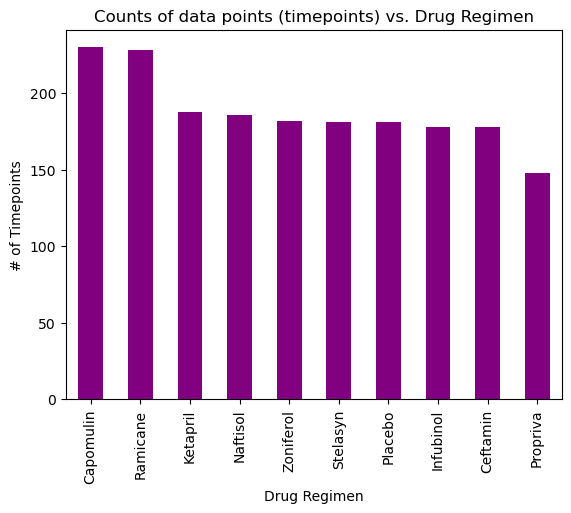

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rowcounts = clean_df['Drug Regimen'].value_counts()
rowscounts
rowcounts.plot(kind="bar", color = "purple")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Timepoints")
plt.title("Counts of data points (timepoints) vs. Drug Regimen")
plt.show()

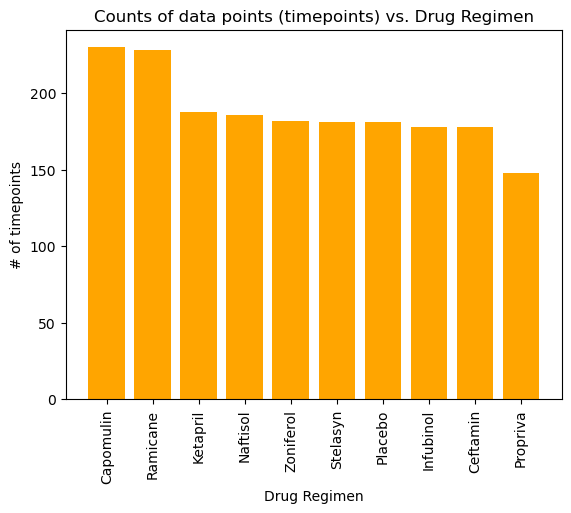

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(rowscounts.index.values,rowscounts.values, color = 'orange')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of timepoints")
plt.title("Counts of data points (timepoints) vs. Drug Regimen")
plt.savefig("Datacountsvsregimenpyplot.png")
plt.show()

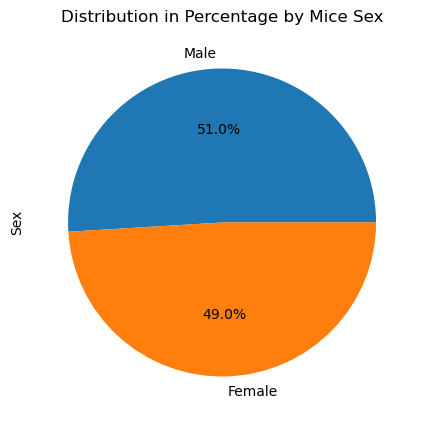

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendercounts = clean_df.Sex.value_counts()

plot = gendercounts.plot.pie( title = "Distribution in Percentage by Mice Sex", figsize=(5, 5), autopct = '%1.1f%%')


<function matplotlib.pyplot.show(close=None, block=None)>

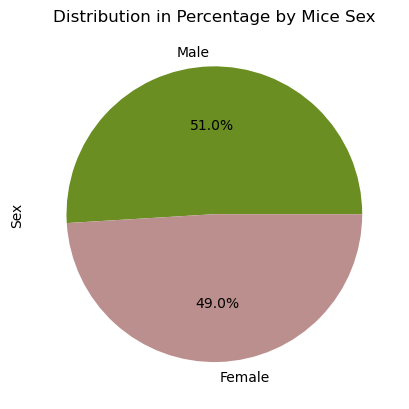

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercounts.values, labels = gendercounts.index.values, autopct = '%1.1f%%', colors = ["olivedrab", "rosybrown"])
plt.title("Distribution in Percentage by Mice Sex")
plt.ylabel("Sex")
plt.savefig("MiceSexDistribution.png")
plt.show

## Quartiles, Outliers and Boxplots

In [56]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_df = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_tp_df,clean_df,on=('Mouse ID','Timepoint'))
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_df = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
     # add subset 
    tumor_data.append(tumor_vol_df)
      
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_df.loc[(tumor_vol_df < lower_bound) | (tumor_vol_df > upper_bound)]
    print(f"{drug} outliers could be below {lower_bound:.2f} mm3 or above {upper_bound:.2f} mm3")    

Capomulin outliers could be below 20.70 mm3 or above 51.83 mm3
Ramicane outliers could be below 17.91 mm3 or above 54.31 mm3
Infubinol outliers could be below 36.83 mm3 or above 82.74 mm3
Ceftamin outliers could be below 25.36 mm3 or above 87.67 mm3


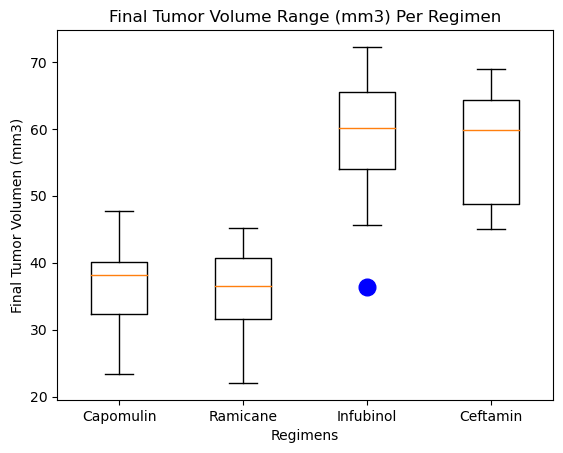

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.subplots()
plt.title("Final Tumor Volume Range (mm3) Per Regimen")
plt.xlabel("Regimens")
plt.ylabel("Final Tumor Volumen (mm3)")
flierprops = dict(marker='o', markerfacecolor='b', markersize=12,
                  linestyle='none', markeredgecolor='b')
plt.boxplot(tumor_data, labels = drugs, flierprops = flierprops)
plt.savefig("TumorVolumeRange_pyplot.png")
plt.show()

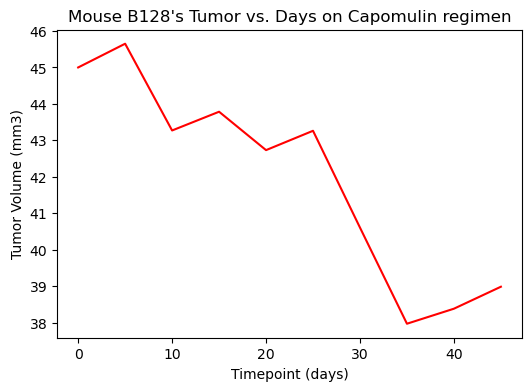

In [106]:
import matplotlib.pyplot as plt

Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mousedata = Capomulin.loc[Capomulin["Mouse ID"] == "b128"]

# Set the figure size before creating the plot
plt.figure(figsize=(6, 4))

# Create the line plot
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'], color='r')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse B128's Tumor vs. Days on Capomulin regimen")

# Save the plot to a file
plt.savefig("Capomulin_mouse_b128.png")

# Show the plot
plt.show()


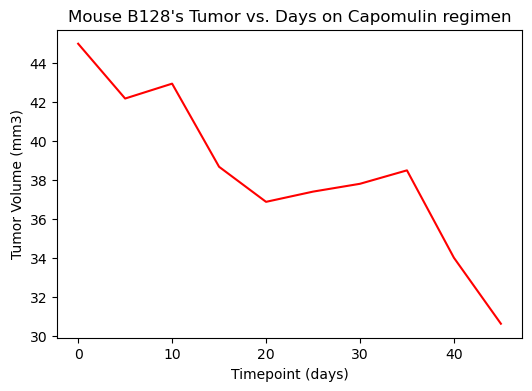

In [108]:
import matplotlib.pyplot as plt

Ramicane= clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
mousedata1 = Ramicane.loc[Ramicane["Mouse ID"] == "z578"]

# Set the figure size before creating the plot
plt.figure(figsize=(6, 4))

# Create the line plot
plt.plot(mousedata1['Timepoint'], mousedata1['Tumor Volume (mm3)'], color='r')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse B128's Tumor vs. Days on Capomulin regimen")

# Save the plot to a file
plt.savefig("Capomulin_mouse_b128.png")

# Show the plot
plt.show()


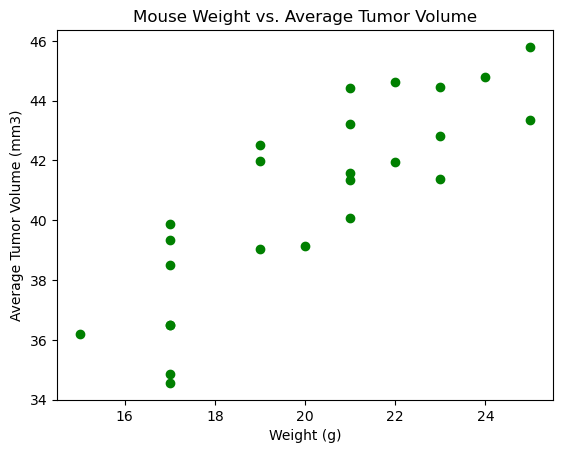

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = Capomulin.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'], color = "g")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.savefig("MouseweightvsAvgTumorVolumnCapomulin.png")
plt.show()

## Correlation and Regression

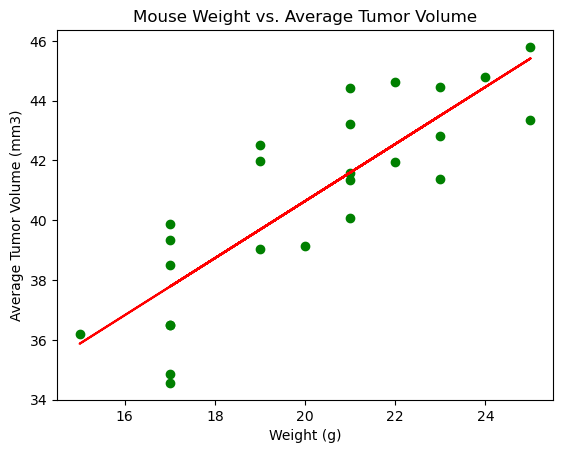

The Correlation Coefficient between mouse weight and tumor vol is: 0.8419363424694722
Linear Regression Model: Y = 0.95X + 21.55
R-squared Value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
# Calculate the correlation coefficient
correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])
# Perform linear regression
result = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
p_value = result.pvalue
std_err = result.stderr
#Plot the regression line 
# Plot the regression line
X = capomulin_avg['Weight (g)']
Y= capomulin_avg['Tumor Volume (mm3)']

plt.plot(capomulin_avg['Weight (g)'], slope * capomulin_avg['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'], color = "g")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.savefig("MouseweightvsAvgTumorVolumnCapomulinwithline.png")
plt.show()

# Print the results
print(f"The Correlation Coefficient between mouse weight and tumor vol is: {correlation}")
print(f"Linear Regression Model: Y = {slope:.2f}X + {intercept:.2f}")
print(f"R-squared Value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

